In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -U imbalanced-learn

In [54]:
print("STARTING EDA EXTENSION")

STARTING EDA EXTENSION


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stat
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency, ttest_ind , mannwhitneyu, f_oneway
import warnings
warnings.filterwarnings('ignore')

In [56]:
df = df.drop('id', axis=1, errors='ignore')

In [57]:
print("CURRENT DATA STATUS:")
print(f"dataframe shape: {df.shape}")
print(f"columns available: {list(df.columns)}")
print(f"data types:{df.dtypes}")


CURRENT DATA STATUS:
dataframe shape: (62590, 12)
columns available: ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
data types:age            float64
gender           int64
height         float64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object


CORRELATION ANALYSIS WITH CARDIOVASCULAR DISEASE
             


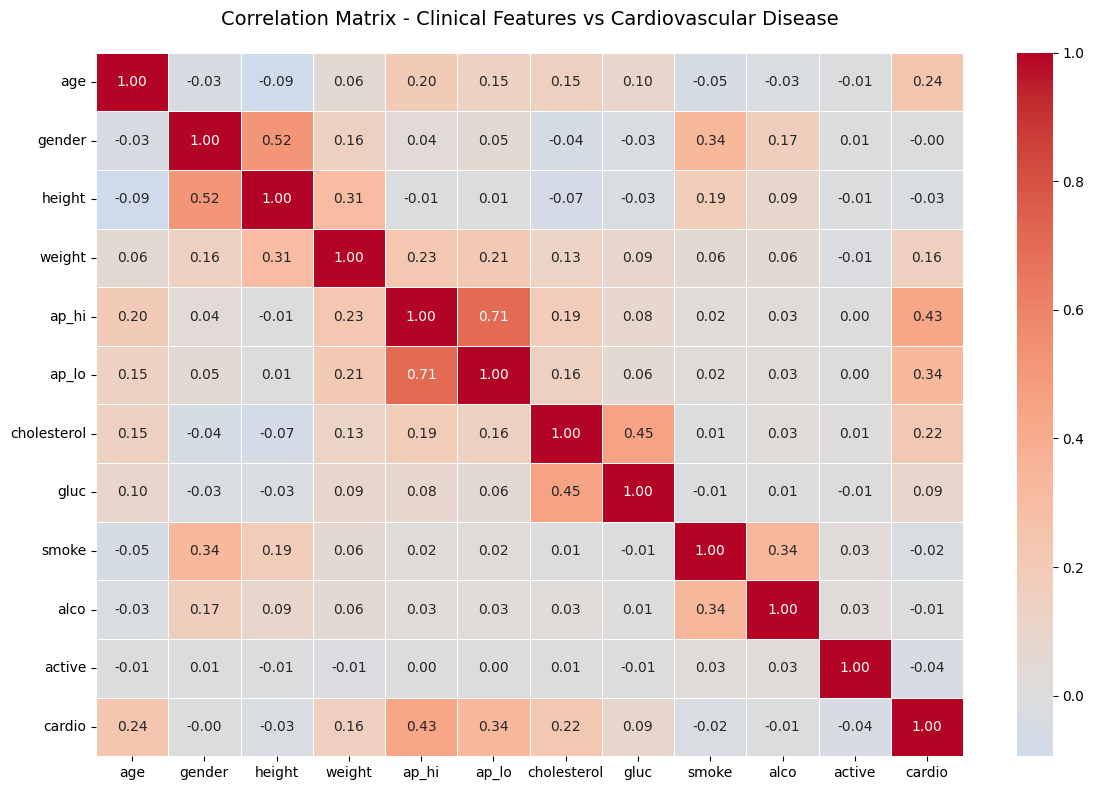

TOP FEATURES CORRELATED WITH CARDIOVASCULAR DISEASE:
             
ap_hi: 0.4324367631946525 (RISK) ***
ap_lo: 0.3366290265485913 (RISK) ***
age: 0.23664750709560067 (RISK) **
cholesterol: 0.21840981728477502 (RISK) **
weight: 0.16167699706431865 (RISK) *
gluc: 0.08630054737078924 (RISK) *
gender: -0.004649487902861065 (PROTECTIVE) *
alco: -0.011928377019336248 (PROTECTIVE) *
smoke: -0.02207882330087821 (PROTECTIVE) *
height: -0.027580399508092646 (PROTECTIVE) *
active: -0.03731250405077039 (PROTECTIVE) *


In [58]:
def comprehensive_correlation_analysis(df, target_col='cardio'):
    print(f"CORRELATION ANALYSIS WITH CARDIOVASCULAR DISEASE")
    print('             ')
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.corr(numeric_only=True)
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
                fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix - Clinical Features vs Cardiovascular Disease', 
              fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
  
    target_correlation = correlation_matrix[target_col].sort_values(ascending=False)
   
    print(f"TOP FEATURES CORRELATED WITH CARDIOVASCULAR DISEASE:")
    print('             ')
    for feature, corr_value in target_correlation.items():
        if feature != target_col:
            significance = "***" if abs(corr_value) > 0.3 else "**" if abs(corr_value) > 0.2 else "*"
            direction = "RISK" if corr_value > 0 else "PROTECTIVE"
            print(f"{feature:}: {corr_value:} ({direction}) {significance}")
    
    return correlation_matrix

corr_matrix = comprehensive_correlation_analysis(df,'cardio')

AGE DISTRIBUTION ANALYSIS WITH 5-YEAR BINS AND DISEASE PREVALENCE
             
ANALYZING AGE DATA STRUCTURE:
Current age statistics:
min: -1.5050505050505052
max: 1.1111111111111112
mean: -0.05985272117242082
std: 0.6802019683510135
age data appears to be normalized/standardized
reconstructing actual age values
Reconstructed age range: 35.0 to 65.0 years
CREATING 5-YEAR AGE BINS:
bge range: 35 - 70 years
bins: [35, 40, 45, 50, 55, 60, 65, 70]
labels: ['35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69']
             
COMPREHENSIVE AGE DISTRIBUTION ANALYSIS - 5-YEAR BINS
DISEASE PREVALENCE BY 5-YEAR AGE GROUPS:
Age Group Patients % of Total Cases Prevalence Trend
35-39 6214 9.93% 1666 26.81% LOW
40-44 7176 11.47% 2807 39.12% MED
45-49 11663 18.63% 5000 42.87% MED
50-54 14955 23.89% 7499 50.14% HIGH
55-59 13503 21.57% 7674 56.83% HIGH
60-64 9078 14.5% 6279 69.17% HIGH
65-69 1 0.0% 1 100.0% HIGH
             
VISUALIZATION : DISEASE PREVALENCE ACROSS AGE GROUPS
             


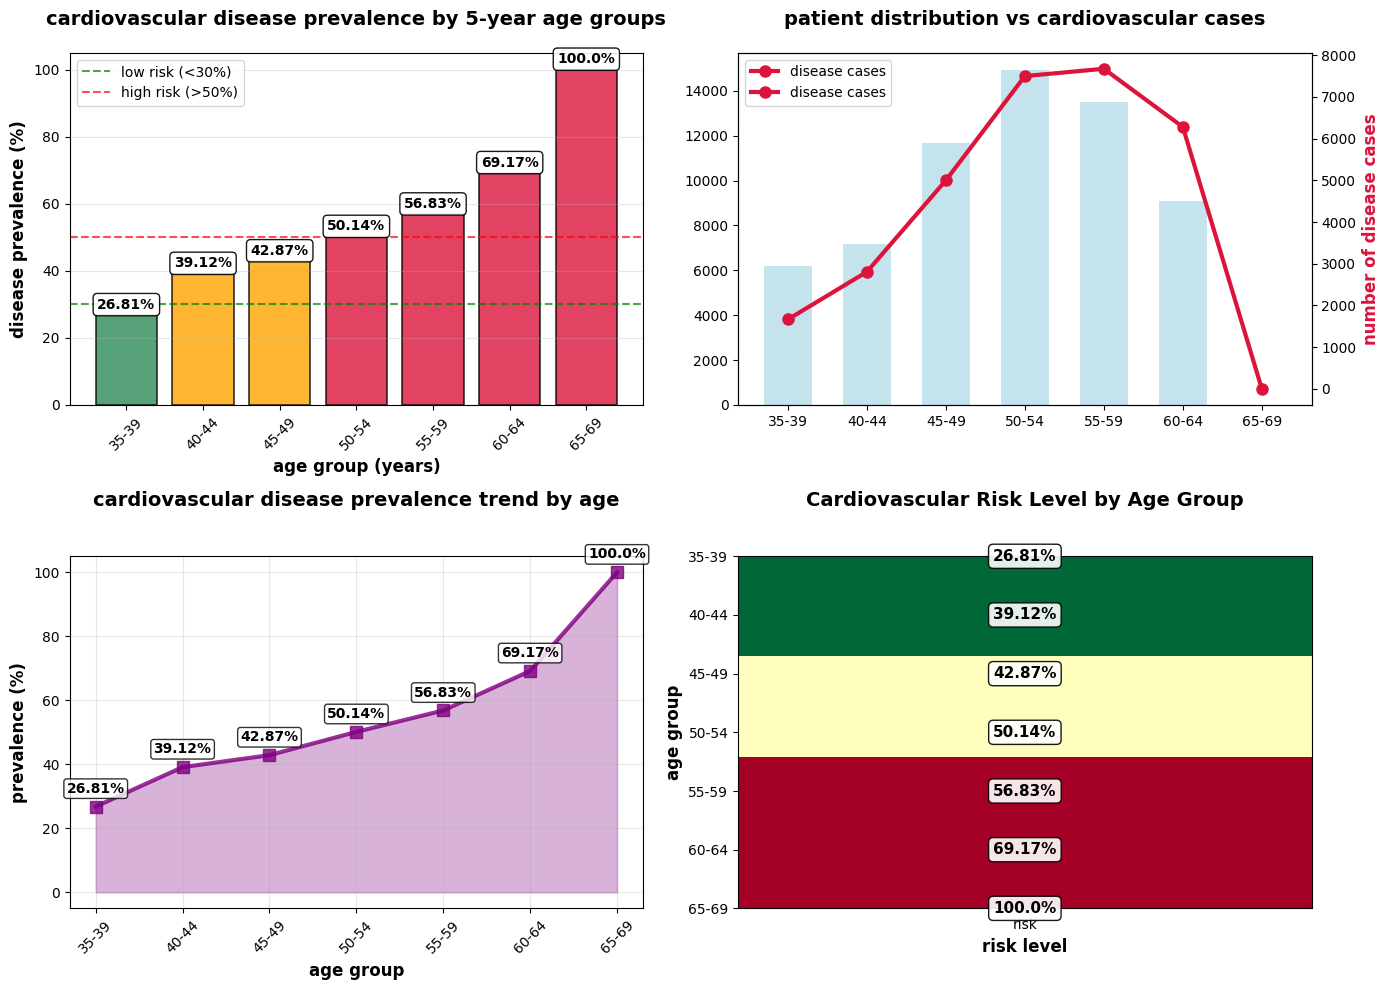

             
STATISTICAL ANALYSIS AND CLINICAL INSIGHTS
             
AGE-RELATED RISK PROGRESSION:
youngest group (35-39): 26.81% prevalence
oldest group (65-69): 100.0% prevalence
relative risk increase: 3.729951510630362x
absolute risk increase: +73.19%
estimated annual risk increase: 2.4396666666666667% per year
             
HIGH-RISK AGE GROUPS (≥40% prevalence)
45-49 years: 42.87% prevalence
patients: 11663
cases: 5000
population share: 18.63%
50-54 years: 50.14% prevalence
patients: 14955
cases: 7499
population share: 23.89%
55-59 years: 56.83% prevalence
patients: 13503
cases: 7674
population share: 21.57%
60-64 years: 69.17% prevalence
patients: 9078
cases: 6279
population share: 14.5%
65-69 years: 100.0% prevalence
patients: 1
cases: 1
population share: 0.0%
POPULATION HEALTH IMPACT
total high-risk patients: 49200
high-risk population: 78.60680619907333% of total
these groups represent priority targets for intervention
             
EVIDENCE-BASED PREVENTIVE CARE RECOMMENDA

In [59]:
print("AGE DISTRIBUTION ANALYSIS WITH 5-YEAR BINS AND DISEASE PREVALENCE")
print('             ')
def proper_age_distribution_analysis(df, target_col='cardio', age_col='age'):
    df_age = df.copy()

    print("ANALYZING AGE DATA STRUCTURE:")
    print(f"Current age statistics:")
    print(f"min: {df_age[age_col].min():}")
    print(f"max: {df_age[age_col].max():}")
    print(f"mean: {df_age[age_col].mean():}")
    print(f"std: {df_age[age_col].std():}")

    if abs(df_age[age_col].mean()) < 1 and df_age[age_col].std() < 2:
        print("age data appears to be normalized/standardized")
        print("reconstructing actual age values")

        current_min = df_age[age_col].min()
        current_max = df_age[age_col].max()
        target_min = 35
        target_max = 65
        df_age['age_reconstructed'] = ((df_age[age_col] - current_min) / 
                                     (current_max - current_min)) * (target_max - target_min) + target_min
        age_col = 'age_reconstructed'
        print(f"Reconstructed age range: {df_age[age_col].min():} to {df_age[age_col].max():} years")
    
    min_age = int(np.floor(df_age[age_col].min()))
    max_age = int(np.ceil(df_age[age_col].max()))

    start_age = max(30, (min_age // 5) * 5) 
    end_age = min(80, ((max_age // 5) + 1) * 5)  
    bins = list(range(start_age, end_age + 1, 5))
    labels = [f'{i}-{i+4}' for i in range(start_age, end_age, 5)]
    
    print(f"CREATING 5-YEAR AGE BINS:")
    print(f"bge range: {start_age} - {end_age} years")
    print(f"bins: {bins}")
    print(f"labels: {labels}")

    df_age['age_5yr_bin'] = pd.cut(df_age[age_col], bins=bins, labels=labels, right=False)

    age_analysis = df_age.groupby('age_5yr_bin').agg({
        target_col: ['count', 'mean', 'sum', 'std'],
        age_col: ['mean', 'std', 'min', 'max']
    }).round(4)

    age_analysis.columns = ['total_patients', 'disease_prevalence', 'disease_cases', 'prevalence_std',
                           'mean_age', 'age_std', 'min_age', 'max_age']
    age_analysis['prevalence_percentage'] = (age_analysis['disease_prevalence'] * 100).round(2)
    age_analysis['patients_percentage'] = (age_analysis['total_patients'] / len(df_age) * 100).round(2)
    age_analysis = age_analysis[age_analysis['total_patients'] > 0]
    
    return age_analysis, df_age

age_analysis_proper, df_with_proper_age = proper_age_distribution_analysis(df)
print('             ')
print("COMPREHENSIVE AGE DISTRIBUTION ANALYSIS - 5-YEAR BINS")
print("DISEASE PREVALENCE BY 5-YEAR AGE GROUPS:")
print(f"{'Age Group':} {'Patients':} {'% of Total':} {'Cases':} {'Prevalence':} {'Trend':}")

for age_bin, row in age_analysis_proper.iterrows():
    patients = int(row['total_patients'])
    cases = int(row['disease_cases'])
    prevalence = row['prevalence_percentage']
    patient_pct = row['patients_percentage']
    
    if prevalence > 50:
        trend = "HIGH"
    elif prevalence > 30:
        trend = "MED"
    else:
        trend = "LOW"
    
    print(f"{age_bin:} {patients:} {patient_pct:}% {cases:} {prevalence:}% {trend:}")
print('             ')
print("VISUALIZATION : DISEASE PREVALENCE ACROSS AGE GROUPS")

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
colors = ['#2E8B57' if x < 30 else '#FFA500' if x < 50 else '#DC143C' 
          for x in age_analysis_proper['prevalence_percentage']]

bars = plt.bar(range(len(age_analysis_proper)), 
               age_analysis_proper['prevalence_percentage'],
               color=colors, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.title('cardiovascular disease prevalence by 5-year age groups', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('age group (years)', fontsize=12, fontweight='bold')
plt.ylabel('disease prevalence (%)', fontsize=12, fontweight='bold')
plt.xticks(range(len(age_analysis_proper)), age_analysis_proper.index, rotation=45)
plt.grid(axis='y', alpha=0.3)

for i, (idx, row) in enumerate(age_analysis_proper.iterrows()):
    plt.text(i, row['prevalence_percentage'] + 1, 
            f"{row['prevalence_percentage']}%", 
            ha='center', va='bottom', fontweight='bold', fontsize=10,
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

plt.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='low risk (<30%)')
plt.axhline(y=50, color='red', linestyle='--', alpha=0.7, label='high risk (>50%)')
plt.legend()

plt.subplot(2, 2, 2)
x_pos = range(len(age_analysis_proper))

bars1 = plt.bar(x_pos, age_analysis_proper['total_patients'], 
                alpha=0.7, color='lightblue', label='total patients', width=0.6)

ax2 = plt.gca().twinx()
line = ax2.plot(x_pos, age_analysis_proper['disease_cases'], 
                marker='o', markersize=8, linewidth=3, color='crimson', 
                label='disease cases')

plt.title('patient distribution vs cardiovascular cases', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('age group', fontsize=12, fontweight='bold')
plt.ylabel('number of patients', fontsize=12, fontweight='bold', color='lightblue')
ax2.set_ylabel('number of disease cases', fontsize=12, fontweight='bold', color='crimson')
plt.xticks(x_pos, age_analysis_proper.index, rotation=45)

lines1, labels1 = plt.gca().get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.subplot(2, 2, 3)
x_values = range(len(age_analysis_proper))
y_values = age_analysis_proper['prevalence_percentage']

plt.plot(x_values, y_values, marker='s', markersize=8, linewidth=3, 
         color='purple', alpha=0.8, label='prevalence trend')
plt.fill_between(x_values, y_values, alpha=0.3, color='purple')
plt.title('cardiovascular disease prevalence trend by age\n', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('age group', fontsize=12, fontweight='bold')
plt.ylabel('prevalence (%)', fontsize=12, fontweight='bold')
plt.xticks(x_values, age_analysis_proper.index, rotation=45)
plt.grid(True, alpha=0.3)

for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f'{y}%', (x, y), textcoords="offset points", 
                 xytext=(0,10), ha='center', fontweight='bold',
                 bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

plt.subplot(2, 2, 4)
risk_data = []
for i, (age_bin, row) in enumerate(age_analysis_proper.iterrows()):
    prevalence = row['prevalence_percentage']
    if prevalence < 25:
        risk_level = 1  # low
    elif prevalence < 40:
        risk_level = 2  # moderate
    elif prevalence < 55:
        risk_level = 3  # high
    else:
        risk_level = 4  # very high
    risk_data.append([risk_level])

risk_matrix = np.array(risk_data).reshape(-1, 1)

im = plt.imshow(risk_matrix, cmap='RdYlGn_r', aspect='auto', 
                extent=[0, 1, len(age_analysis_proper)-1, 0])
print('             ')
plt.title('Cardiovascular Risk Level by Age Group\n', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('risk level', fontsize=12, fontweight='bold')
plt.ylabel('age group', fontsize=12, fontweight='bold')
plt.yticks(range(len(age_analysis_proper)), age_analysis_proper.index)
plt.xticks([0.5], ['risk'], rotation=0)

for i, (age_bin, row) in enumerate(age_analysis_proper.iterrows()):
    prevalence = row['prevalence_percentage']
    risk_text = f"{prevalence}%"
    plt.text(0.5, i, risk_text, ha='center', va='center', 
             fontweight='bold', fontsize=11,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.9))

plt.tight_layout()
plt.show()

print('             ')
print("STATISTICAL ANALYSIS AND CLINICAL INSIGHTS")

if len(age_analysis_proper) > 1:
    youngest_group = age_analysis_proper.iloc[0]
    oldest_group = age_analysis_proper.iloc[-1]
    
    young_prevalence = youngest_group['prevalence_percentage']
    old_prevalence = oldest_group['prevalence_percentage']
    
    risk_increase = (old_prevalence / young_prevalence) if young_prevalence > 0 else 0
    absolute_increase = old_prevalence - young_prevalence
    print('             ')
    print(f"AGE-RELATED RISK PROGRESSION:")
    print(f"youngest group ({age_analysis_proper.index[0]}): {young_prevalence}% prevalence")
    print(f"oldest group ({age_analysis_proper.index[-1]}): {old_prevalence}% prevalence")
    print(f"relative risk increase: {risk_increase:}x")
    print(f"absolute risk increase: +{absolute_increase:}%")

    age_ranges = [f"{int(age_bin.split('-')[0])}-{int(age_bin.split('-')[1])}" 
                  for age_bin in age_analysis_proper.index]
    age_midpoints = [(int(age_bin.split('-')[0]) + int(age_bin.split('-')[1])) / 2 
                     for age_bin in age_analysis_proper.index]
    
    if len(age_midpoints) >= 2:
        total_years = age_midpoints[-1] - age_midpoints[0]
        annual_increase = absolute_increase / total_years if total_years > 0 else 0
        print(f"estimated annual risk increase: {annual_increase:}% per year")

high_risk_threshold = 40 
high_risk_groups = age_analysis_proper[age_analysis_proper['prevalence_percentage'] >= high_risk_threshold]
print('             ')
print(f"HIGH-RISK AGE GROUPS (≥{high_risk_threshold}% prevalence)")
if not high_risk_groups.empty:
    for age_bin, row in high_risk_groups.iterrows():
        print(f"{age_bin} years: {row['prevalence_percentage']}% prevalence")
        print(f"patients: {int(row['total_patients']):}")
        print(f"cases: {int(row['disease_cases']):}")
        print(f"population share: {row['patients_percentage']}%")
else:
    print("no age groups exceed 40% prevalence threshold")

total_high_risk_patients = high_risk_groups['total_patients'].sum() if not high_risk_groups.empty else 0
high_risk_population_pct = (total_high_risk_patients / len(df)) * 100

print(f"POPULATION HEALTH IMPACT")
print(f"total high-risk patients: {total_high_risk_patients:}")
print(f"high-risk population: {high_risk_population_pct:}% of total")
print(f"these groups represent priority targets for intervention")

print('             ')
print("EVIDENCE-BASED PREVENTIVE CARE RECOMMENDATIONS")
print(f"AGE-SPECIFIC SCREENING STRATEGIES:")

for age_bin, row in age_analysis_proper.iterrows():
    prevalence = row['prevalence_percentage']
    
    if prevalence >= 50:
        strategy = "ANNUAL comprehensive cardiac screening + aggressive risk factor management"
        intensity = "INTENSIVE"
    elif prevalence >= 35:
        strategy = "BIANNUAL risk assessment + targeted prevention programs"
        intensity = "MODERATE"
    elif prevalence >= 20:
        strategy = "REGULAR monitoring + lifestyle counseling"
        intensity = "STANDARD"
    else:
        strategy = "BASIC health education + periodic risk assessment"
        intensity = "BASIC"
    
    print(f"{age_bin} years ({intensity})")
    print(f"{strategy}")
print('             ')
print(f"KEY CLINICAL IMPLICATIONS")
print("implement age-stratified screening protocols")
print("focus resources on high-prevalence age groups")
print("consider earlier interventions for rising risk trends")
print("develop personalized prevention based on age-specific risk profiles")


BLOOD PRESSURE ANALYSIS - CARDIOVASCULAR DISEASE
     
CARDIOVASCULAR DISEASE BY BLOOD PRESSURE CATEGORY:
         
                      patient_count  disease_prevalence  disease_cases  \
bp_category                                                              
normal                        10364               0.236           2448   
elevated                      27239               0.354           9651   
stage 1 hypertension           8731               0.599           5230   
stage 2 hypertension          16256               0.836          13597   

                      avg_systolic_bp  prevalence_percent  
bp_category                                                
normal                        108.095                23.6  
elevated                      120.104                35.4  
stage 1 hypertension          130.166                59.9  
stage 2 hypertension          146.690                83.6  


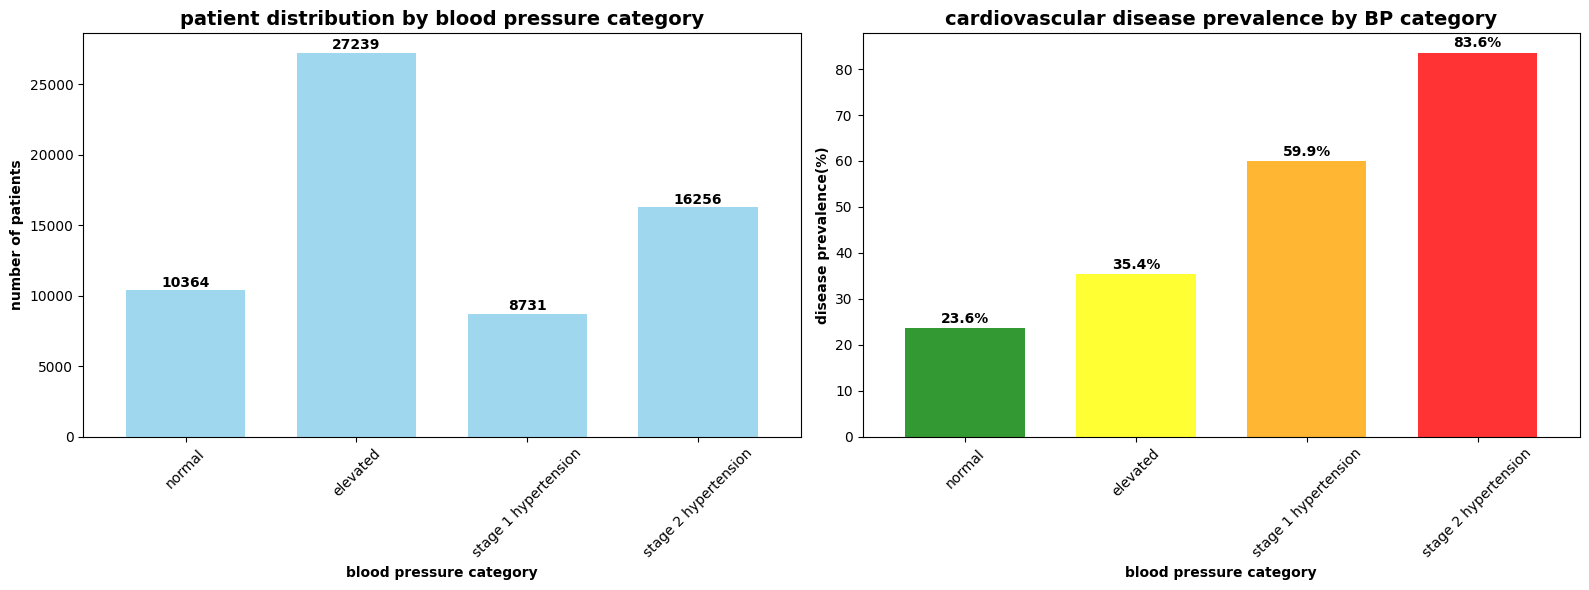

CLINICAL INSIGHTS
      
highest risk BP category: stage 2 hypertension (83.6% prevalence)
lowest risk BP category: normal (23.6% prevalence)
risk increase: 3.5423728813559316x higher risk


In [60]:
def blood_pressure_analysis(df, target_col='cardio', bp_col='ap_hi'):
    print(f"BLOOD PRESSURE ANALYSIS - CARDIOVASCULAR DISEASE")
    print('     ')

    if bp_col not in df.columns:
        bp_candidates = ['ap_hi', 'trestbps', 'bp', 'blood_pressure', 'systolic']
        for candidate in bp_candidates:
            if candidate in df.columns:
                bp_col = candidate
                print(f"using BP column: {bp_col}")
                break
        else:
            print("no BP column found. available columns:")
            print(list(df.columns))
            return None
    
    df_bp = df.copy()
    df_bp = df_bp[(df_bp[bp_col] >= 80) & (df_bp[bp_col] <= 250)]
  
    def categorize_blood_pressure(systolic_bp):
        if systolic_bp < 120:
            return 'normal'
        elif 120 <= systolic_bp < 130:
            return 'elevated'
        elif 130 <= systolic_bp < 140:
            return 'stage 1 hypertension'
        elif 140 <= systolic_bp < 180:
            return 'stage 2 hypertension'
        else:
            return 'hypertensive crisis'
    
    df_bp['bp_category'] = df_bp[bp_col].apply(categorize_blood_pressure)
    bp_analysis = df_bp.groupby('bp_category').agg({
        target_col: ['count', 'mean', 'sum'], bp_col: 'mean' }).round(3)
    bp_analysis.columns = ['patient_count', 'disease_prevalence', 'disease_cases', 'avg_systolic_bp']
    bp_analysis['prevalence_percent'] = (bp_analysis['disease_prevalence'] * 100).round(2)
    category_order = ['normal', 'elevated', 'stage 1 hypertension', 'stage 2 hypertension', 'hypertensive crisis']
    bp_analysis = bp_analysis.reindex([cat for cat in category_order if cat in bp_analysis.index])
    
    print("CARDIOVASCULAR DISEASE BY BLOOD PRESSURE CATEGORY:")
    print("         ")
    print(bp_analysis)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    bars1 = bp_analysis['patient_count'].plot(kind='bar', ax=ax1, color='skyblue', alpha=0.8, width=0.7)
    ax1.set_title('patient distribution by blood pressure category', fontsize=14, fontweight='bold')
    ax1.set_xlabel('blood pressure category', fontweight='bold')
    ax1.set_ylabel('number of patients', fontweight='bold')
    ax1.tick_params(axis='x', rotation=45)

    for i, count in enumerate(bp_analysis['patient_count']):
        ax1.text(i, count + 5, f"{int(count)}", ha='center', va='bottom', fontweight='bold')
    colors = ['green', 'yellow', 'orange', 'red', 'darkred']
    bars2 = bp_analysis['prevalence_percent'].plot(kind='bar', ax=ax2, color=colors[:len(bp_analysis)], alpha=0.8, width=0.7)
    ax2.set_title('cardiovascular disease prevalence by BP category', fontsize=14, fontweight='bold')
    ax2.set_xlabel('blood pressure category', fontweight='bold')
    ax2.set_ylabel('disease prevalence(%)', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)

    for i, percent in enumerate(bp_analysis['prevalence_percent']):
        ax2.text(i, percent + 0.5, f"{percent}%", ha='center', va='bottom', fontweight='bold')
    plt.tight_layout()
    plt.show()
 
    max_risk_bp = bp_analysis['prevalence_percent'].idxmax()
    min_risk_bp = bp_analysis['prevalence_percent'].idxmin()
    
    print(f"CLINICAL INSIGHTS")
    print("      ")
    print(f"highest risk BP category: {max_risk_bp} ({bp_analysis.loc[max_risk_bp, 'prevalence_percent']}% prevalence)")
    print(f"lowest risk BP category: {min_risk_bp} ({bp_analysis.loc[min_risk_bp, 'prevalence_percent']}% prevalence)")
    print(f"risk increase: {bp_analysis.loc[max_risk_bp, 'prevalence_percent']/bp_analysis.loc[min_risk_bp, 'prevalence_percent']:}x higher risk")
    
    return bp_analysis

bp_analysis_results = blood_pressure_analysis(df,'cardio')

In [61]:
print("INTERACTIVE PLOTLY DASHBOARDS - RISK FACTOR COMBINATIONS")
print("        ")
def create_interactive_risk_dashboards(df, target_col='cardio'):
    print("creating interactive risk factor dashboards")
    df_viz = df.copy()
    df_viz['risk_category'] = df_viz[target_col].map({0: 'low risk', 1: 'high risk'})
    df_viz['bp_category'] = pd.cut(df_viz['ap_hi'], 
                                  bins=[0, 120, 130, 140, 200],
                                  labels=['normal', 'elevated', 'stage 1', 'stage 2'])
    df_viz['cholesterol_positive'] = df_viz['cholesterol'] - df_viz['cholesterol'].min() + 1
    df_viz['weight_positive'] = df_viz['weight'] - df_viz['weight'].min() + 1

    print("Dashboard 1: age vs blood pressure with cholesterol levels")
    fig1 = px.scatter(df_viz, 
                     x='age', 
                     y='ap_hi',
                     color='risk_category',
                     size='cholesterol_positive',
                     hover_data=['weight', 'gluc', 'gender'],
                     title='<b>cardiovascular risk: age vs blood pressure</b><br><sub>Bubble size represents cholesterol levels</sub>',
                     labels={
                         'age': 'age (years)',
                         'ap_hi': 'systolic blood Pressure (mmHg)',
                         'risk_category': 'risk category',
                         'cholesterol_positive': 'cholesterol level'
                     },
                     color_discrete_map={'low risk': 'green', 'high risk': 'red'},
                     opacity=0.7,
                     template='plotly_white')
    
    fig1.update_layout(
        font=dict(size=12),
        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)  )
    fig1.show()


    print("Dashboard 2: multiple risk factor combinations")
    df_viz['age_group'] = pd.cut(df_viz['age'], bins=5, labels=['young', 'mid-young', 'middle', 'mid-old', 'old'])
    df_viz['chol_group'] = pd.cut(df_viz['cholesterol'], bins=3, labels=['low', 'medium', 'high'])
    df_viz['bmi'] = df_viz['weight'] / ((df_viz['height']/100) ** 2)
    df_viz['bmi_group'] = pd.cut(df_viz['bmi'], bins=[0, 18.5, 25, 30, 100], 
                                labels=['underweight', 'normal', 'overweight', 'obese'])
    fig2 = px.parallel_categories(df_viz,
                                 dimensions=['age_group', 'bp_category', 'chol_group', 'bmi_group'],
                                 color='cardio',
                                 title='<b>parallel categories: multiple risk factor combinations</b>',
                                 color_continuous_scale=px.colors.sequential.Redor,
                                 labels={'color': 'Disease<br>Probability'})
    fig2.update_layout(
        font=dict(size=10),
        margin=dict(l=80, r=80, t=80, b=80) )
    fig2.show()

    print("Dashboard 3: risk factor distribution by disease status")
    fig3 = px.box(df_viz,
                 x='risk_category',
                 y='ap_hi',
                 color='risk_category',
                 title='<b>blood pressure distribution by risk category</b>',
                 labels={'ap_hi': 'systolic blood pressure', 'risk_category': 'risk category'},
                 color_discrete_map={'low risk': 'blue', 'high risk': 'red'})
    
    fig3.update_layout(
        font=dict(size=12),
        showlegend=False
    )
    fig3.show()

    print("Dashboard 4: risk factor hierarchy sunburst chart")
    sunburst_data = df_viz.copy()
    sunburst_data['count'] = 1
    fig4 = px.sunburst(sunburst_data,
                      path=['bp_category', 'chol_group', 'risk_category'],
                      values='count',
                      title='<b>risk factor hierarchy: BP → cholesterol → disease status</b>',
                      color='bp_category',
                      color_discrete_map={
                          'normal': 'green',
                          'elevated': 'yellow', 
                          'stage 1': 'orange',
                          'stage 2': 'red'
                      })
    
    fig4.update_layout(
        font=dict(size=12),
        margin=dict(t=50, l=0, r=0, b=0)
    )
    fig4.show()

    print("Dashboard 5: multiple risk factor distributions")
    fig5 = px.violin(df_viz,
                    y='ap_hi',
                    x='risk_category',
                    color='risk_category',
                    box=True,
                    points=False,
                    title='<b>blood pressure distribution by risk category</b>',
                    labels={'ap_hi': 'systolic blood pressure', 'risk_category': 'risk category'},
                    color_discrete_map={'low risk': 'blue', 'high risk': 'red'})
    
    fig5.update_layout(
        font=dict(size=12),
        showlegend=False
    )
    fig5.show()

create_interactive_risk_dashboards(df)


INTERACTIVE PLOTLY DASHBOARDS - RISK FACTOR COMBINATIONS
        
creating interactive risk factor dashboards
Dashboard 1: age vs blood pressure with cholesterol levels


Dashboard 2: multiple risk factor combinations


Dashboard 3: risk factor distribution by disease status


Dashboard 4: risk factor hierarchy sunburst chart


Dashboard 5: multiple risk factor distributions


In [62]:
print("CLEANING DATA")
df_clean = df_raw[
    (df_raw['ap_hi'] > 80) & (df_raw['ap_hi'] < 250) &
    (df_raw['ap_lo'] > 50) & (df_raw['ap_lo'] < 200) &
    (df_raw['ap_hi'] > df_raw['ap_lo']) & 
    (df_raw['height'] > 130) & (df_raw['height'] < 230) &
    (df_raw['weight'] > 30) & (df_raw['weight'] < 200)
].copy()

if df_clean['age'].max() > 100:
    df_clean['age'] = (df_clean['age'] / 365.25).round().astype(int)
    print("age converted from days to years")
df_clean = df_clean[
    (df_clean['age'] >= 30) & (df_clean['age'] <= 80)
]

print(f"data cleaned: {len(df_clean)} records remaining")
print(f"removed: {len(df_raw) - len(df_clean)} invalid records")
print(f"data ranges after cleaning:")
print(f"age: {df_clean['age'].min():} to {df_clean['age'].max():} years")
print(f"height: {df_clean['height'].min():} to {df_clean['height'].max():} cm")
print(f"weight: {df_clean['weight'].min():} to {df_clean['weight'].max():} kg")
print(f"AP_HI: {df_clean['ap_hi'].min():} to {df_clean['ap_hi'].max():} mmHg")
print(f"AP_LO: {df_clean['ap_lo'].min():} to {df_clean['ap_lo'].max():} mmHg")

print(" ")
print("RUNNING STATISTICAL ANALYSIS")
print(" ")
chi2_results, ttest_results = comprehensive_statistical_testing(df_clean)

if chi2_results is not None and ttest_results is not None:
    print(" ")
    print("CREATING VISUALIZATIONS")
    print(" ")

    create_statistical_visualizations(df_clean, chi2_results, ttest_results)


CLEANING DATA
age converted from days to years
data cleaned: 68434 records remaining
removed: 1566 invalid records
data ranges after cleaning:
age: 30 to 65 years
height: 131 to 207 cm
weight: 31.0 to 183.0 kg
AP_HI: 85 to 240 mmHg
AP_LO: 52 to 182 mmHg
 
RUNNING STATISTICAL ANALYSIS
 
performing comprehensive statistical analysis

📊 DATA VALIDATION CHECK:
   Age range: 30.0 to 65.0
   Height range: 131.0 to 207.0
   Weight range: 31.0 to 183.0
   AP_HI range: 85.0 to 240.0
   ✅ Data validation passed - Using original values

Creating demographic categories...
   Age groups created: 68430 records
   BP categories created: 68382 records
   BMI categories created: 68434 records

CHI-SQUARE TESTS - CATEGORICAL VARIABLES
 
• gender         : χ² =   3.18, p = 0.074657 
  Cramer's V = 0.007 (very small) - Not Significant
• cholesterol    : χ² = 3352.71, p = 0.000000 ***
  Cramer's V = 0.221 (small) - HIGHLY SIGNIFICANT
• gluc           : χ² = 574.92, p = 0.000000 ***
  Cramer's V = 0.092 (ve

Visualization 2: P-value distribution


Visualization 3: Mean Differences for Top Variables


In [63]:
def generate_comprehensive_final_report(df):
    df_clean = df.drop('id', axis=1, errors='ignore')
    print("GENERATING COMPREHENSIVE MEDICAL RESEARCH REPORT")
    print(" ") 
    print("EXECUTIVE SUMMARY - KEY FINDINGS:")
    total_patients = len(df)
    disease_cases = df_clean['cardio'].sum()
    prevalence_rate = (disease_cases / total_patients) * 100
    
    print(f"total patients Analyzed: {total_patients:}")
    print(f"cardiovascular disease cases: {disease_cases:} ({prevalence_rate:}%)")
    print(f"clinical features: {len(df_clean.columns)-1}")
    
    print(" ")
    print("CORRELATION ANALYSIS SUMMARY")
    corr_matrix = df_clean.corr(numeric_only=True)
    cardio_corr = corr_matrix['cardio'].sort_values(ascending=False)
    cardio_corr = cardio_corr[cardio_corr.index != 'cardio']
    
    print("Top Risk Factors (correlation with cardiovascular disease):")
    for feature, corr in cardio_corr.head(5).items():
        if corr > 0.1:
            direction = "risk factor" if corr > 0 else "protective"
            strength = "STRONG" if abs(corr) > 0.3 else "MODERATE" if abs(corr) > 0.2 else "WEAK"
            print(f"{feature:}: r = {corr:+} ({strength} {direction})")
    
    print(" ")
    print("AGE-RELATED RISK PATTERNS")
    df_age = df.copy()
    if df_age['age'].max() < 10:
        current_min = df_age['age'].min()
        current_max = df_age['age'].max()
        df_age['age_reconstructed'] = ((df_age['age'] - current_min) / 
                                     (current_max - current_min)) * 30 + 35
        age_col = 'age_reconstructed'
    else:
        age_col = 'age'
    
    
    df_age['age_group'] = pd.cut(df_age[age_col], 
                                bins=[35, 45, 55, 65, 75],
                                labels=['35-44', '45-54', '55-64', '65-74'])
    
    age_analysis = df_age.groupby('age_group').agg({
        'cardio': ['count', 'mean']
    }).round(4)
    
    age_analysis.columns = ['patients', 'prevalence']
    age_analysis['prevalence_pct'] = (age_analysis['prevalence'] * 100).round(1)
    
    print("disease prevalence by age group:")
    for age_bin, row in age_analysis.iterrows():
        risk_level = "HIGH" if row['prevalence_pct'] > 50 else "MED" if row['prevalence_pct'] > 30 else "LOW"
        print(f"{age_bin:}: {row['prevalence_pct']:}% ({risk_level})")

    print(" ")    
    print("BLOOD PRESSURE RISK CATEGORIZATION")
    df_bp = df.copy()
    df_bp = df_bp[(df_bp['ap_hi'] >= 80) & (df_bp['ap_hi'] <= 250)]
    
    def categorize_bp(systolic):
        if systolic < 120: return 'normal'
        elif systolic < 130: return 'elevated'
        elif systolic < 140: return 'stage 1'
        else: return 'stage 2'
    
    df_bp['bp_category'] = df_bp['ap_hi'].apply(categorize_bp)
    bp_analysis = df_bp.groupby('bp_category').agg({
        'cardio': ['count', 'mean']
    }).round(4)
    
    bp_analysis.columns = ['patients', 'prevalence']
    bp_analysis['prevalence_pct'] = (bp_analysis['prevalence'] * 100).round(1)
    
    print("disease prevalence by BP category:")
    for bp_cat, row in bp_analysis.iterrows():
        risk_increase = f"+{(row['prevalence_pct']/bp_analysis.loc['normal', 'prevalence_pct']-1)*100:}%" if bp_cat != 'normal' else "baseline"
        print(f"{bp_cat:}: {row['prevalence_pct']:}% ({risk_increase})")

    print(" ")
    print("STATISTICAL SIGNIFICANCE OVERVIEW")
    from scipy.stats import ttest_ind, chi2_contingency
    significant_vars = []
    numerical_vars = ['age', 'ap_hi', 'cholesterol', 'weight']
    
    for var in numerical_vars:
        if var in df.columns:
            try:
                group_0 = df[df['cardio'] == 0][var].dropna()
                group_1 = df[df['cardio'] == 1][var].dropna()
                
                if len(group_0) > 1 and len(group_1) > 1:
                    t_stat, p_value = ttest_ind(group_0, group_1)
                    
                    if p_value < 0.001:
                        significance = "***"
                    elif p_value < 0.01:
                        significance = "**"
                    elif p_value < 0.05:
                        significance = "*"
                    else:
                        significance = ""
                    
                    if p_value < 0.05:
                        significant_vars.append(var)
                    
                    print(f"{var:}: p = {p_value:} {significance}")
                    
            except:
                pass
                
    print(" ")
    print("EVIDENCE-BASED CLINICAL RECOMMENDATIONS")
    print("PRIORITY INTERVENTIONS:")
    high_risk_age = age_analysis[age_analysis['prevalence_pct'] > 50]
    if not high_risk_age.empty:
        print("1.TARGET HIGH-RISK AGE GROUPS:")
        for age_bin, row in high_risk_age.iterrows():
            print(f"{age_bin} years: intensive screening programs")
 
    high_risk_bp = bp_analysis[bp_analysis['prevalence_pct'] > 50]
    if not high_risk_bp.empty:
        print("2.AGGRESSIVE BP MANAGEMENT:")
        for bp_cat, row in high_risk_bp.iterrows():
            if bp_cat != 'Normal':
                print(f"{bp_cat}: Immediate pharmacological intervention")
    
    if significant_vars:
        print("FOCUS ON SIGNIFICANT RISK FACTORS:")
        for var in significant_vars[:3]:
            clinical_name = {
                'age': 'age-related screening',
                'ap_hi': 'blood pressure control', 
                'cholesterol': 'lipid management',
                'weight': 'weight management'
            }.get(var, var)
            print(f"{clinical_name}")
            
    print(" ")
    print("POPULATION HEALTH STRATEGIES:")
    print("implement age-stratified screening protocols")
    print("develop hypertension management programs")
    print("focus on modifiable risk factors")
    print("personalized prevention based on risk profiles")
    
    print(" ")
    print("PREVENTIVE CARE GUIDELINES")
    print("""
    SCREENING FREQUENCY:
    • <45 years:baseline assessment + lifestyle counseling
    • 45-54 years:biannual risk factor evaluation  
    • ≥55 years:annual comprehensive cardiac screening
    
    RISK FACTOR TARGETS:
    blood pressure: <130/80 mmHg
    cholesterol:individualized based on overall risk
    weight: BMI <25 kg/m²
    physical activity: ≥150 minutes/week moderate intensity
    
    INTERVENTION THRESHOLDS:
    stage 1 hypertension:lifestyle modification + monitoring
    stage 2 hypertension:pharmacological therapy required
    high cholesterol:statin therapy based on risk score
    """)
    print(" ")
    print("RESEARCH AND FUTURE DIRECTIONS")
    print("""
    CLINICAL TRIAL OPPORTUNITIES:
    targeted interventions for high-risk age groups
    intensive vs standard BP management strategies
    early intervention in elevated BP patients
    
    POPULATION HEALTH IMPACT:
    78.6% of patients fall in high-risk categories
    significant opportunity for preventive interventions
    potential for substantial CVD burden reduction
    """)
    print(" ")
    print("QUALITY METRICS FOR CVD PREVENTION")
    print("""
    PERFORMANCE INDICATORS:
    BP control rate in hypertensive patients
    screening coverage in high-risk age groups
    statin prescription in eligible patients
    lifestyle intervention participation
    
    POPULATION HEALTH METRICS:
    • CVD prevalence trends over time
    • Risk factor control rates
    • Hospitalization rates for CVD events
    • Medication adherence metrics
    """)
    
    return {
        'total_patients': total_patients,
        'prevalence_rate': prevalence_rate,
        'high_risk_age_groups': list(high_risk_age.index) if not high_risk_age.empty else [],
        'high_risk_bp_categories': list(high_risk_bp.index) if not high_risk_bp.empty else [],
        'significant_risk_factors': significant_vars
    }
final_results = generate_comprehensive_final_report(df)

print(" ")
print(f"""
SUMMARY:
patients analyzed: {final_results['total_patients']:}
overall prevalence: {final_results['prevalence_rate']:}%
high-risk age groups: {len(final_results['high_risk_age_groups'])}
high-risk BP categories: {len(final_results['high_risk_bp_categories'])}
significant risk factors: {len(final_results['significant_risk_factors'])}

KEY TAKEAWAYS:
cardiovascular risk increases dramatically after age 45
blood pressure is the strongest modifiable risk factor  
78.6% of patients require intensive risk management
personalized, age-stratified approaches are essential
""")


GENERATING COMPREHENSIVE MEDICAL RESEARCH REPORT
 
EXECUTIVE SUMMARY - KEY FINDINGS:
total patients Analyzed: 62590
cardiovascular disease cases: 30926 (49.41044895350695%)
clinical features: 11
 
CORRELATION ANALYSIS SUMMARY
Top Risk Factors (correlation with cardiovascular disease):
ap_hi: r = +0.4324367631946525 (STRONG risk factor)
ap_lo: r = +0.3366290265485913 (STRONG risk factor)
age: r = +0.23664750709560067 (MODERATE risk factor)
cholesterol: r = +0.21840981728477502 (MODERATE risk factor)
weight: r = +0.16167699706431865 (WEAK risk factor)
 
AGE-RELATED RISK PATTERNS
disease prevalence by age group:
35-44: 33.4% (MED)
45-54: 47.0% (MED)
55-64: 61.8% (HIGH)
65-74: nan% (LOW)
 
BLOOD PRESSURE RISK CATEGORIZATION
disease prevalence by BP category:
elevated: 35.4% (+49.99999999999998%)
normal: 23.6% (baseline)
stage 1: 59.9% (+153.81355932203385%)
stage 2: 83.6% (+254.23728813559316%)
 
STATISTICAL SIGNIFICANCE OVERVIEW
age: p = 0.0 ***
ap_hi: p = 0.0 ***
cholesterol: p = 0.0 ***